In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/contrails-images-ash-color/valid_df.csv
/kaggle/input/contrails-images-ash-color/train_df.csv


KeyboardInterrupt: 

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
a=np.load("/kaggle/input/contrails-images-ash-color/contrails/1000603527582775543.npy")
print(a.shape) #R,G,B,MASK

(256, 256, 4)


In [3]:
print("RGB VALUES")
b=a[:,:,:3]
print(b)
print("MASK VALUES")
c=a[:,:,3]
print(c)

RGB VALUES
[[[0.     0.497  0.561 ]
  [0.     0.4724 0.551 ]
  [0.     0.4766 0.554 ]
  ...
  [0.     0.979  0.923 ]
  [0.     1.     0.9307]
  [0.     1.     0.9375]]

 [[0.     0.4893 0.5596]
  [0.     0.487  0.56  ]
  [0.     0.4763 0.557 ]
  ...
  [0.     1.     0.8984]
  [0.     1.     0.9053]
  [0.     1.     0.9155]]

 [[0.     0.566  0.6104]
  [0.     0.523  0.5913]
  [0.     0.4949 0.58  ]
  ...
  [0.     1.     0.8794]
  [0.     1.     0.8867]
  [0.     1.     0.899 ]]

 ...

 [[0.     0.953  0.939 ]
  [0.     0.948  0.9272]
  [0.     0.9487 0.923 ]
  ...
  [0.     0.935  0.9385]
  [0.     0.919  0.9185]
  [0.     0.909  0.9   ]]

 [[0.     0.974  0.946 ]
  [0.     0.9595 0.927 ]
  [0.     0.9355 0.91  ]
  ...
  [0.     0.926  0.923 ]
  [0.     0.925  0.909 ]
  [0.     0.923  0.896 ]]

 [[0.     0.945  0.938 ]
  [0.     0.942  0.9175]
  [0.     0.9507 0.895 ]
  ...
  [0.     0.929  0.9272]
  [0.     0.9253 0.9146]
  [0.     0.921  0.9004]]]
MASK VALUES
[[1. 1. 1. ... 0. 0. 0.

In [4]:
x=[]
y=[]
c=0
for file in os.listdir("/kaggle/input/contrails-images-ash-color/contrails"):
    if(c<1000): #Initially Considering Only 1000 Images. Will Be Scaling Up Later.
        a=np.load("/kaggle/input/contrails-images-ash-color/contrails/"+file)
        xa=a[:,:,:3]
        ya=a[:,:,3]
        x.append(xa)
        y.append(ya)
        
        c+=1

In [5]:
x=np.array(x)
y=np.array(y)



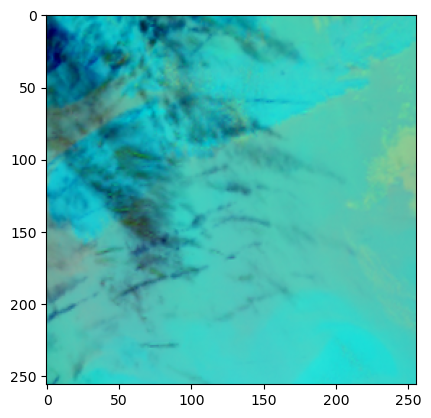

In [6]:
#Ash Color Scheme
plt.imshow(x[10].astype(float))

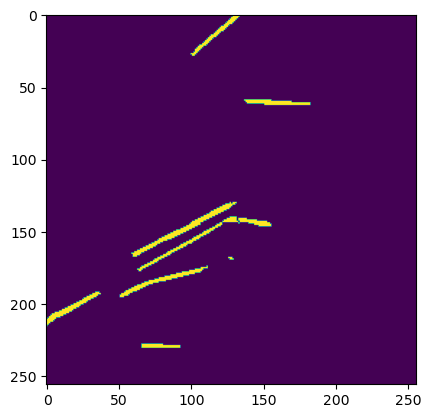

In [7]:
#Human Pixel Mask
plt.imshow(y[10].astype(float))

In [8]:
#spliting data into train and test set
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
print('Training Set Size ',len(xtrain))
print('Testing Set Size ',len(xtest))

Training Set Size  800
Testing Set Size  200


In [12]:
from keras.models import *
from keras.layers import *

In [14]:
import numpy as np
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, Concatenate, Input, Cropping2D, Flatten
from keras.models import Model
from tensorflow import keras

In [15]:
def conv(inputs, num_filters):
    x = Conv2D(num_filters, (3, 3), activation="relu", 
                               kernel_initializer="he_normal", padding="same")(inputs)
    x = Dropout(0.1)(x)
    x = Conv2D(num_filters, (3, 3), activation="relu", 
                               kernel_initializer="he_normal", padding="same")(x)
    return x

In [16]:
def deconv(inputs, conv_prev, num_filters):
    up = Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding="same")(inputs)
    concat =  tf.keras.layers.concatenate([up, conv_prev])
    conva = conv(concat, num_filters)
    return conva

In [18]:
inputs = Input((256, 256, 3))


In [19]:
c1=conv(inputs,16)
p1=MaxPooling2D((2,2))(c1)

In [22]:
c2=conv(p1,32)
p2=MaxPooling2D((2,2))(c2)

In [23]:
c3=conv(p2,64)
p3=MaxPooling2D((2,2))(c3)

In [24]:
c4=conv(p3,128)
p4=MaxPooling2D((2,2))(c4)

In [25]:
c5=conv(p4,256)

In [26]:
c6 = deconv(c5, c4, 128)
c7 = deconv(c6, c3, 64)
c8 = deconv(c7, c2, 32)
c9 = deconv(c8, c1, 16)


In [27]:
op= Conv2D(1, (1, 1), activation='sigmoid')(c9)

In [28]:
model = tf.keras.Model(inputs=[inputs], outputs=[op])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [29]:
results = model.fit(
    xtrain, 
    ytrain, 
    validation_split = 0.1, 
    batch_size = 16, 
    epochs = 10)

Epoch 1/10


2023-07-19 14:22:55.854890: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


45/45 [==============================] - 30s 187ms/step - loss: 0.1084 - accuracy: 0.9764 - val_loss: 0.0840 - val_accuracy: 0.9945
Epoch 2/10
45/45 [==============================] - 8s 177ms/step - loss: 0.0491 - accuracy: 0.9947 - val_loss: 0.0472 - val_accuracy: 0.9945
Epoch 3/10
45/45 [==============================] - 8s 178ms/step - loss: 0.0353 - accuracy: 0.9947 - val_loss: 0.0355 - val_accuracy: 0.9945
Epoch 4/10
45/45 [==============================] - 8s 177ms/step - loss: 0.0330 - accuracy: 0.9947 - val_loss: 0.0367 - val_accuracy: 0.9945
Epoch 5/10
45/45 [==============================] - 8s 178ms/step - loss: 0.0324 - accuracy: 0.9947 - val_loss: 0.0318 - val_accuracy: 0.9945
Epoch 6/10
45/45 [==============================] - 8s 181ms/step - loss: 0.0333 - accuracy: 0.9947 - val_loss: 0.0328 - val_accuracy: 0.9945
Epoch 7/10
45/45 [==============================] - 8s 183ms/step - loss: 0.0315 - accuracy: 0.9947 - val_loss: 0.0314 - val_accuracy: 0.9945
Epoch 8/10
45/45

In [31]:
model.save("semantic.h5")

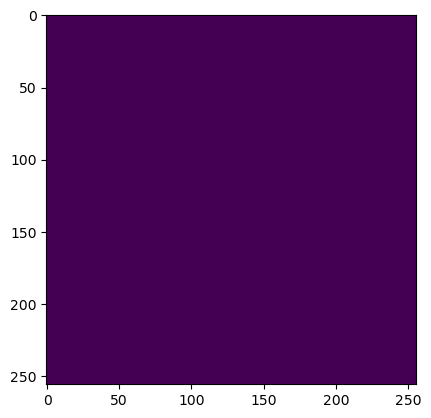

In [45]:
xt=xtest[76]
yt=ytest[76]

plt.imshow(yt.astype(float))

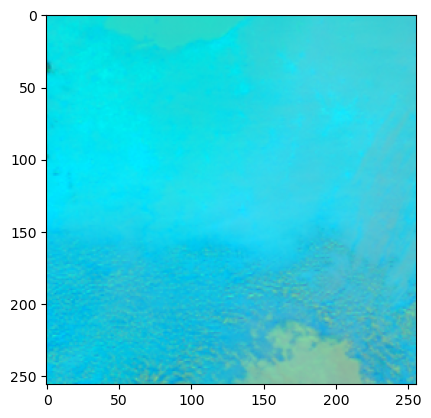

In [46]:
plt.imshow(xt.astype(float))

In [51]:
xt=xt.reshape(-1,256,256,3)


In [52]:
pred=model.predict(xt)

1/1 [==============================] - 1s 837ms/step


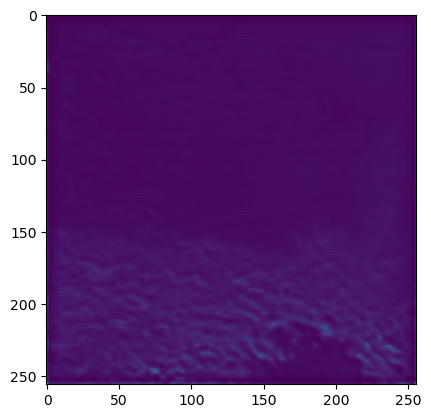

In [54]:
plt.imshow(pred[0].reshape(256,256))